# Quick Recap

Yesterday in Session 1, we covered:

    1.) Introduction to Python
    2.) Numbers (int and float)
    3.) Data structure (string, list, dictionary)
    4.) Array (numpy)
    5.) Condition statement (if-elif-else)
    6.) For/while loop
    7.) Fuctions
    8.) Matplotlib

# Exploring Astropy (FITS handling) and learn DS9 tool 

# Astropy

Astropy is a Python package for astronomy that provides core functionality and common tools for astronomy and astrophysics. <br>

You can explore it here: https://docs.astropy.org/en/stable/index_user_docs.html

In [ ]:
# # To install astropy, run:
# %pip install astropy

import astropy
print(f"Astropy version: {astropy.__version__}")  # You can check astropy version

Astropy version: 5.3.4


## Constants in Astropy

Astropy provides physical and astronomical constants with units.

In [33]:
from astropy import constants as const

# Fundamental constants
print(f"Speed of light: {const.c}")
print(f"Gravitational constant: {const.G}")
print(f"Planck constant: {const.h}")

# Astronomical constants
print(f"Solar mass: {const.M_sun}")
print(f"Earth mass: {const.M_earth}")
print(f"Parsec: {const.pc}")

Speed of light: 299792458.0 m / s
Gravitational constant: 6.6743e-11 m3 / (kg s2)
Planck constant: 6.62607015e-34 J s
Solar mass: 1.988409870698051e+30 kg
Earth mass: 5.972167867791379e+24 kg
Parsec: 3.085677581491367e+16 m


As you can see, all of them has the `relevant SI units` along with the values. How is this happening? Can we also do that? <br>

Astropy handles units and unit conversions elegantly. We will explore that in the code below.

### Example 1

In [34]:
from astropy import units as u

# Creating quantities with units
distance = 15.2 * u.m
time = 32.4 * u.s
speed = distance / time
print(f"Speed: {speed}")

# Unit conversions
print(f"15.2 m in parsecs: {(15.2 * u.m).to(u.pc)}")
print(f"32.4 s in hours: {(32.4 * u.s).to(u.hour)}")

Speed: 0.4691358024691358 m / s
15.2 m in parsecs: 4.925984519955434e-16 pc
32.4 s in hours: 0.009 h


### Example 2

In [35]:
# Composite units
energy = 500 * u.kg * u.m**2 / u.s**2
print(f"Energy in Joules: {energy}")
print(f"Energy in erg: {energy.to(u.erg)}")

Energy in Joules: 500.0 m2 kg / s2
Energy in erg: 5000000000.0 erg


### Example 3

In [ ]:
# 1 light-year to various units
ly = 1 * u.lyr

print("\n1 Light-year in other units:")
print(f"Parsecs: {ly.to(u.pc):.4f}")      
print(f"Meters: {ly.to(u.m):.2e}")       
print(f"Astronomical Units: {ly.to(u.au):.2e}")  
print(f"Kilometers: {ly.to(u.km):.2e}")    


1 Light-year in other units:
Parsecs: 0.3066 pc
Meters: 9.46e+15 m
Astronomical Units: 6.32e+04 AU
Kilometers: 9.46e+12 km


## Coordinate System

In [36]:
from astropy.coordinates import SkyCoord

# Creating a coordinate from degrees
c1 = SkyCoord(ra=10.625 * u.degree, dec=41.2 * u.degree, frame='icrs')
print(c1)

# Creating from HMS/DMS strings
c2 = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
print(c2)

# Galactic coordinates
c_gal = SkyCoord(l=121.1743 * u.degree, b=-21.5733 * u.degree, frame='galactic')
print(f"Galactic coordinates: {c_gal}")
print(f"Converted to ICRS: {c_gal.icrs}")

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>
<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>
Galactic coordinates: <SkyCoord (Galactic): (l, b) in deg
    (121.1743, -21.5733)>
Converted to ICRS: <SkyCoord (ICRS): (ra, dec) in deg
    (10.68467197, 41.26875781)>


In [ ]:
# Calculating distance between two coordinates

# Define two points on the sky
star1 = SkyCoord('00h42m44.3s', '+41d16m09s', frame='icrs')
star2 = SkyCoord('02h42m40s', '+12d16m08s', frame='icrs')

# Calculate separation
sep = star1.separation(star2)
print(f"Separation: {sep}")
print(f"Separation in arcseconds: {sep.arcsecond}\"")

Separation: 39.07385548040611 deg
Separation in arcseconds: 140665.879729462"


# Opening FITS files and loading the image data

FITS : Flexible Image Transport System

You can save both image and header (heading/key info) or data table in this format.

Astronomers use this format to save and analyse data.

## Display FITS file

Have you seen the Horsehead Nebula?

In [1]:
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# Important
from astropy.io import fits
from astropy.utils.data import download_file

In [2]:
# %matplotlib inline
plt.style.use(astropy_mpl_style)
image_file = download_file('http://www.astropy.org/astropy-data/tutorials/FITS-images/HorseHead.fits', cache=True)

Let’s open the FITS file to find out what it contains.

In [3]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /Users/supersatya/.astropy/cache/download/url/217b4fe80e6f349ef703ceed7e0be888/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


Generally, the image information is located in the <code>PRIMARY</code> block. The blocks are numbered and can be accessed by indexing <code>hdu_list</code>.

In [4]:
hdu_list[0].header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

.


In [5]:
image_data = hdu_list[0].data
image_data

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype=int16)

Our data is now stored as a 2D numpy array.  But how do we know the dimensions of the image?  We can look at the `shape` of the array.

In [6]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


In [7]:
image_data1 = fits.getdata(image_file)
image_data1
# print(image_data.shape)

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype=int16)

In [8]:
np.array_equal(image_data,image_data1)

True

Great! At this point, we can close the FITS file because we've stored everything we wanted to a variable.

In [9]:
hdu_list.close()

# Viewing the image data and getting basic statistics

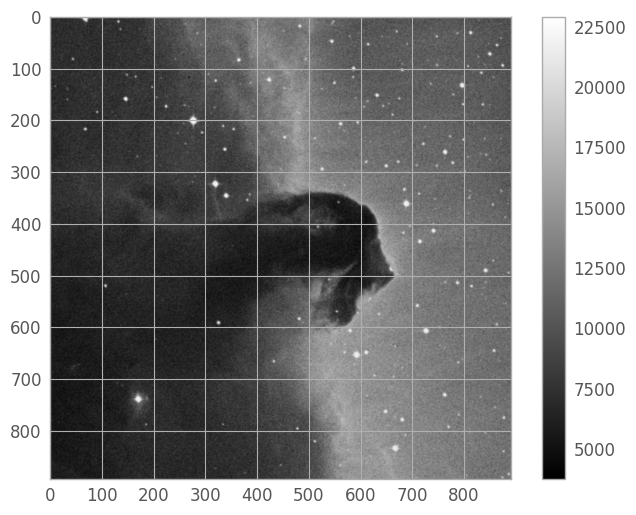

In [ ]:
# %matplotlib inline
plt.imshow(image_data, cmap='gray')  #cmap means colormap
plt.colorbar()

For more color maps http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

Let's get some basic statistics about our image:

In [11]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Std deviation:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Std deviation: 3032.3927542049046


### Plotting a histogram

To make a histogram with `matplotlib.pyplot.hist()`, we'll need to cast the data from a 2D array to something one dimensional.

In this case, let's use the `ndarray.flatten()` to return a 1D numpy array.

In [12]:
image_data.flatten()

array([ 7201,  6642,  6642, ..., 11987, 12546, 12546], dtype=int16)

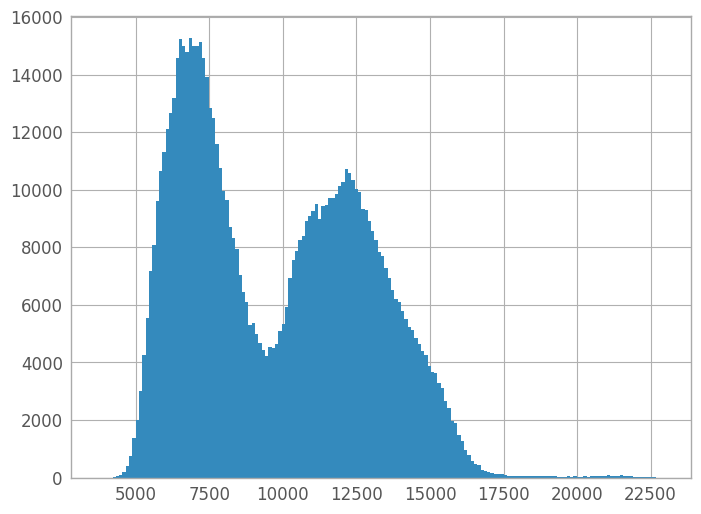

In [13]:
histogram = plt.hist(image_data.flatten(), bins='auto')

## Same thing but logarithmic!

What if we want to use a logarithmic color scale? To do so, we'll need to load the `LogNorm` object from `matplotlib`.

In [14]:
from matplotlib.colors import LogNorm

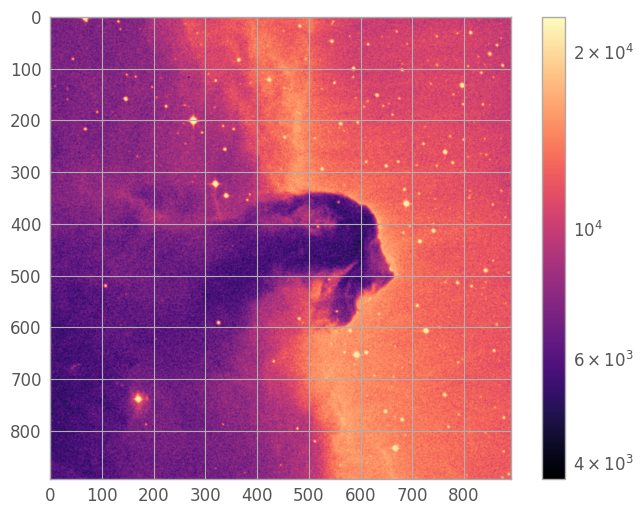

In [15]:
plt.imshow(image_data, cmap='magma', norm=LogNorm())

plt.colorbar()

Do you know why this is better? Because color makes it more visually clear and `log scale` enhances even the `small variation`. <br>

For example: 1e-5 and 1e-4, although small but its log is -5 and -4 (Quite distinct now !!).

# M42 - Orion Nebula

https://dr12.sdss.org/fields

In [16]:
g=fits.open(r"./fits_files/frame-u-006073-4-0063.fits")
g[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4649973257.37 / 1st row Number of seconds since Nov 17 1858    
RA      =            83.820000 / 1st row RA of telescope boresight (deg)        
DEC     =           -5.349071  / 1st row Dec of telescope boresight (degrees)   
SPA     =             180.000  / 1st row Cam col position angle wrt N (deg)     
IPA     =             137.18

In [29]:
# plt.figure()
# plt.imshow(fits.getdata('frame-g-005183-2-0406.fits'), cmap='Greens')
# image_hist = plt.hist(fits.getdata('frame-g-005183-2-0406.fits').flatten(), bins='auto')

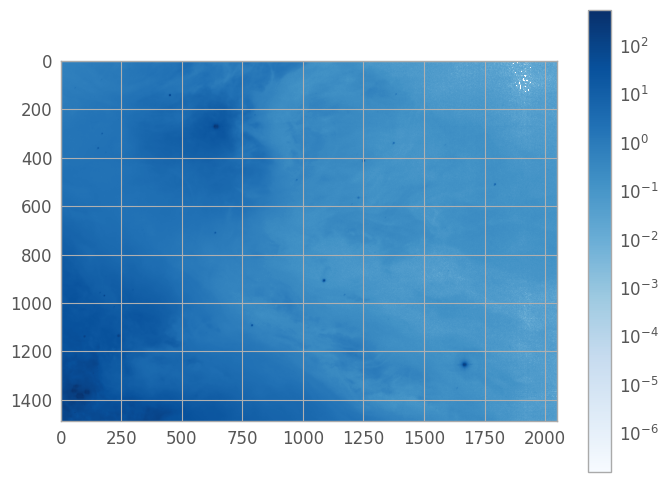

In [18]:
plt.figure()
plt.imshow(fits.getdata(r'./fits_files/frame-u-006073-4-0063.fits'),norm=LogNorm(),cmap="Blues")
cbar = plt.colorbar()


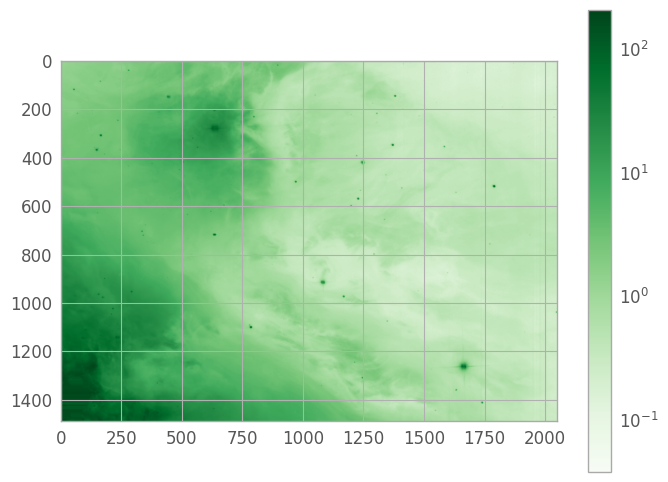

In [19]:
plt.figure()
plt.imshow(fits.getdata(r'./fits_files/frame-g-006073-4-0063.fits'),norm=LogNorm(),cmap="Greens")
cbar = plt.colorbar()

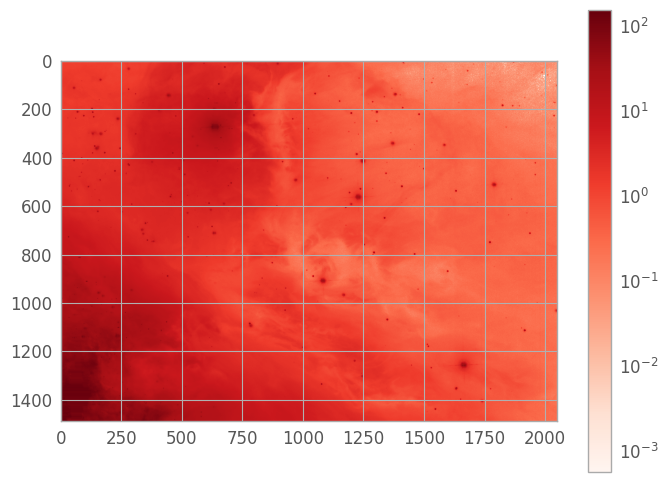

In [20]:
plt.figure()
plt.imshow(fits.getdata(r"./fits_files/frame-i-006073-4-0063.fits"),norm=LogNorm(),cmap="Reds")
cbar = plt.colorbar()

# Combining into colourful from individual filters

In [21]:
from astropy.visualization import make_lupton_rgb 

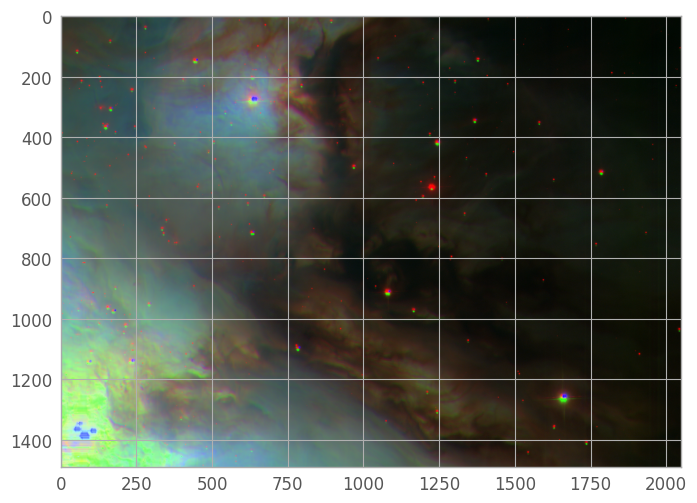

In [22]:
b=fits.getdata(r'./fits_files/frame-u-006073-4-0063.fits')
r=fits.getdata(r'./fits_files/frame-i-006073-4-0063.fits')
g=fits.getdata(r'./fits_files/frame-g-006073-4-0063.fits')
plt.figure()
plt.imshow(make_lupton_rgb(r,g,b))


## Convert jpg to fits

Load and display the original 3-color jpeg image:

Image size: 1280 x 960


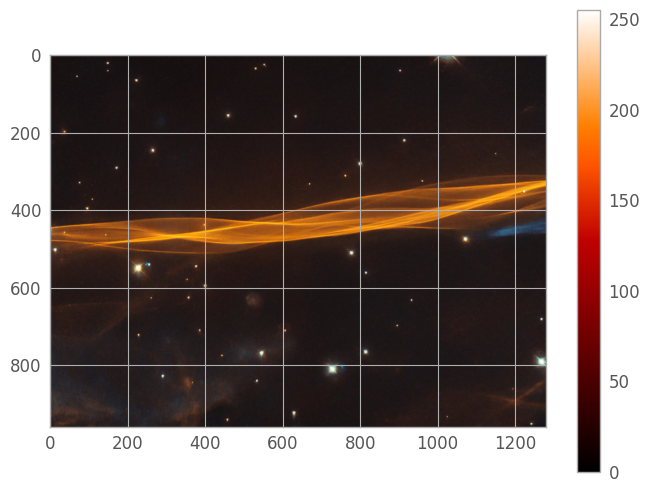

In [23]:
# %matplotlib inline
import numpy as np
from PIL import Image
from astropy.io import fits
import matplotlib.pyplot as plt
# from astropy.visualization import astropy_mpl_style
# plt.style.use(astropy_mpl_style)
image = Image.open('./images/hubble_image.jpeg')
xsize, ysize = image.size
print("Image size: {} x {}".format(xsize, ysize))
plt.imshow(image)
np.array(image.getdata())
plt.colorbar()

In [24]:
r, g, b = image.split()
r_data = np.array(r.getdata()) # data is now an array of length ysize*xsize
g_data = np.array(g.getdata())
b_data = np.array(b.getdata())
print(r_data.shape)
r_data

(1228800,)


array([25, 25, 24, ..., 27, 27, 28])

Split the three channels (RGB) and get the data as Numpy arrays. The arrays
are flattened, so they are 1-dimensional:



In [25]:
r_data = r_data.reshape(ysize, xsize)
g_data = g_data.reshape(ysize, xsize)
b_data = b_data.reshape(ysize, xsize)

red = fits.PrimaryHDU(data=r_data)
red.writeto('red.fits')

green = fits.PrimaryHDU(data=g_data)
green.writeto('green.fits')

blue = fits.PrimaryHDU(data=b_data)
blue.writeto('blue.fits')

Display are three

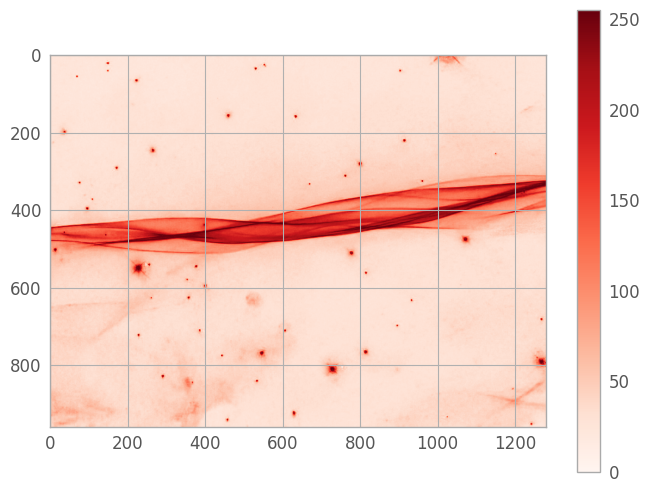

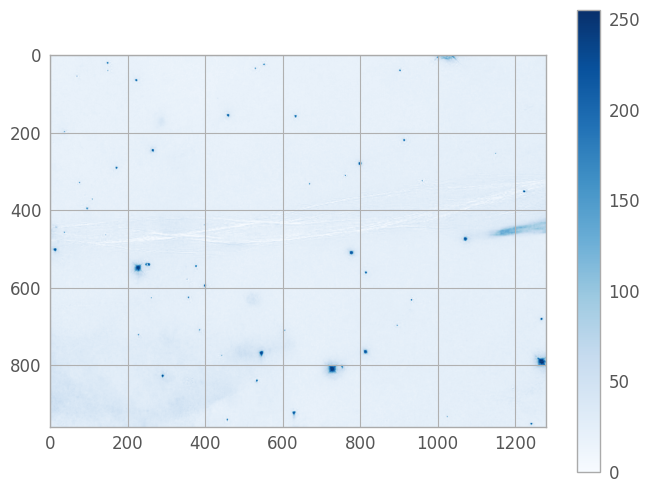

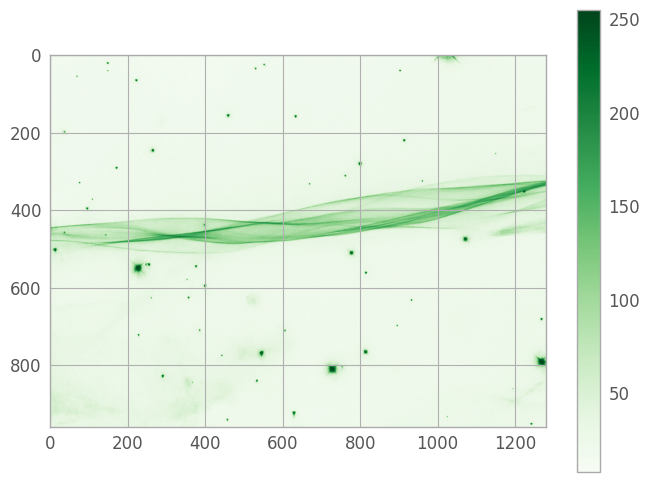

In [26]:
plt.figure()
plt.imshow(fits.getdata('red.fits'),cmap="Reds")
plt.colorbar()
plt.figure()
plt.imshow(fits.getdata('blue.fits'),cmap="Blues")
plt.colorbar()
plt.figure()
plt.imshow(fits.getdata('green.fits'),cmap="Greens")
plt.colorbar()

In [27]:
red_image=fits.open('red.fits')
red_image[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1280                                                  
NAXIS2  =                  960                                                  
EXTEND  =                    T                                                  

## Writing into FITS

In [28]:
hdulist = fits.open('red.fits')
# hdulist.info()
hdulist[0].header
# hdulist.close()

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1280                                                  
NAXIS2  =                  960                                                  
EXTEND  =                    T                                                  

In [29]:
fits.setval('red.fits', 'OBSERVER', value='Satyapriya Das')
fits.setval('red.fits', 'Date', value='5-06-2025')
fits.setval('red.fits', 'AUTHOR', value='ISA')

In [30]:
hdulist = fits.open('red.fits')
# hdulist.info()
HDU=hdulist[0].header
HDU
# hdulist.close()

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1280                                                  
NAXIS2  =                  960                                                  
EXTEND  =                    T                                                  
OBSERVER= 'Satyapriya Das'                                                      
DATE    = '5-06-2025'                                                           
AUTHOR  = 'ISA     '                                                            

In [31]:
fits.setval('red.fits', 'Message', value='Today is 5th June',comment="Fits file created by Satyapriya Das")